In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 1

In [2]:
letters = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"," "]

In [3]:
"".join(np.random.choice(letters, 300))

'fapjnuyjbtlvxmcnaothpolklvnxqsjpuqnojmenqzftqjqbvhx  xyqjhbafxmtkrhsycorauqnwhixxjuvjimigvjuqsuxen jzamgkdxugb vovlpgajwlfdrtslur rmmumvuetussdmxxtctkmyfbrdttvsigdhjhh wpwezpuydlckegjlos odvazetoivkaltkmrdbagwkxk gmwfsmhtdbiecrdehicqjimczmqkyfppznppgfcihcggilftbgckcvqevrlisxqqlxpaopunfmnnfdrvmmpzmfz'

In [4]:
sentence = "".join(np.random.choice(letters, 10000000))

In [5]:
notSpaces = list(filter( lambda x: len(x)>0, sentence.split(" ")))
counter = 0
for word in notSpaces:
    counter+= len(word)
mean = counter/len(notSpaces)
print(mean)

27.016928847777844


# 2

In [6]:
with open("norm_hamlet.txt", "r") as f:
    text = f.read()

data = {}
for letter in text:
    try:
        data[letter] +=1
    except:
        data[letter] = 1
#data.pop(" ", None)


In [7]:
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)} # sort
data

{' ': 31819,
 'e': 14797,
 't': 11847,
 'o': 10846,
 'a': 9521,
 'i': 8396,
 's': 8338,
 'h': 8164,
 'n': 8156,
 'r': 7495,
 'l': 5625,
 'd': 5060,
 'u': 4231,
 'm': 3880,
 'y': 3189,
 'w': 3083,
 'f': 2722,
 'c': 2624,
 'g': 2268,
 'p': 1853,
 'b': 1795,
 'v': 1219,
 'k': 1165,
 'x': 174,
 'q': 145,
 'j': 111,
 'z': 80}

In [8]:
sum = np.sum(list(data.values()))
data = {k: v/sum for k, v in data.items()}

[]

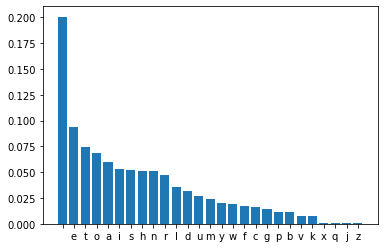

In [9]:
plt.bar(data.keys(), data.values())
plt.plot()

# 3

In [10]:
"".join(np.random.choice(list(data.keys()), 300, p=list(data.values())))

' e etoees ogomvhtleeust roeoa im dafathl f  heiwd hpki tso ygss s abc s  neoorwsd wosuttgr tf hvehnlgr n  u ytv aoieneiaae i i   r itt er nherdolrchoui artpgrei pr ee io eeuaianunuhdc cgulniyaotvrfmi tlapifoa tteeosa ioyt i amye nrn fornry uh rf hrmteu uae eohwnboaefl aheea uaaepsraioolgodlowuhs sot'

In [11]:
sentence = "".join(np.random.choice(list(data.keys()), 10000000, p=list(data.values())))

In [12]:
notSpaces = list(filter( lambda x: len(x)>0, sentence.split(" ")))
counter = 0
for word in notSpaces:
    counter+= len(word)
mean = counter/len(notSpaces)
print(mean)

4.987882678525084


# 4

In [13]:
with open("norm_wiki_sample.txt", "r") as f:
    text = f.read()

In [14]:
data = {}
for index in range(len(text) - 2):
    sequence = text[index:index+2]
    if(sequence[0] not in ["e","t"]):
        continue
    try:
        data[sequence] +=1
    except:
        data[sequence] = 1

sum = np.sum(list(data.values()))
data = {k: v/sum for k, v in data.items()}
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)} # sort

[]

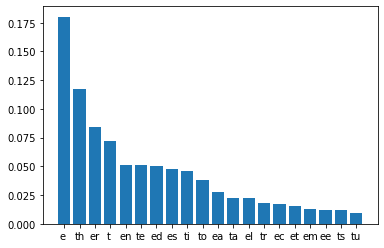

In [15]:
plt.bar(list(data.keys())[:20], list(data.values())[:20])
plt.plot()

# 5

In [36]:
def Markov(source, row):
    data = {}
    for index in range(len(source) - row-1):
        sequence = source[index:index+row]
        letter = source[index+row]
        try:
            data[sequence][letter] +=1
        except:
            try:
                data[sequence][letter] = 1
            except:
                data[sequence] = {letter : 1 } 
    
    for key in data.keys():
        sum = np.sum(list(data[key].values()))
        data[key] = {k: v/sum for k, v in data[key].items()}
    return data

In [17]:
data = Markov(text, 2)

In [18]:
def generate(seed, data):
    return np.random.choice(list(data[seed].keys()), p=list(data[seed].values()))

Wygeneruj przybli»enie j¦zyka angielskiego na podstawie ¹ródªa Markova
pierwszego rz¦du (¹ródªa, gdzie prawdopodobie«stwo nast¦pnego symbolu
zale»y od 1. poprzedniego).

In [38]:
data1 = Markov(text, 1)

In [39]:
seed = np.random.choice(letters)

In [40]:
seq = seed
for _ in range(200):
    seq += generate(seq[-1], data1)
print(seq)

f 1 320071992012 mes t rata otougeaserevomis a licinamegedoros qun am ty cacoment ales nre a chan on ancus mmal tith 20 triscadunowipl orecting os it arive wowin s therbblluespused 4719 5 gebed s st wi


In [55]:
sentence = seed
for _ in range(100000):
    sentence += generate(sentence[-1], data1)
    
notSpaces = list(filter( lambda x: len(x)>0, sentence.split(" ")))
counter = 0
for word in notSpaces:
    counter+= len(word)
mean = counter/len(notSpaces)
print(mean)

4.785086196922365


Nast¦pnie zrób to samo dla ¹ródªa Markova trzeciego rz¦du (¹ródªa, gdzie
prawdopodobie«stwo nast¦pnego symbolu zale»y od 3. poprzednich). (3pt)

In [41]:
data2 = Markov(text, 2)

In [42]:
data3 = Markov(text, 3)

In [43]:
seed = np.random.choice(letters)

In [44]:
seq = seed
seq += generate(seq[-1], data1)
seq += generate(seq[-2:], data2)
for _ in range(200):
    seq += generate(seq[-3:], data3)
print(seq)

f andicincluditin pland is lyokohr rook alsh from thes its and outs cludinand producatesme bask obtainterns boards bryond sained are eney colome and kapitary on the stronwicz rgb b belling to 10 amp mass


In [56]:
seq = seed
seq += generate(seq[-1], data1)
seq += generate(seq[-2:], data2)
sentence = seq
for _ in range(100000):
    sentence += generate(sentence[-3:], data3)
    
notSpaces = list(filter( lambda x: len(x)>0, sentence.split(" ")))
counter = 0
for word in notSpaces:
    counter+= len(word)
mean = counter/len(notSpaces)
print(mean)

4.8898639495847815


Na koniec wygeneruj przybli»enie ¹ródªa Markova pi¡tego rzedu. Zaczynij
od ci¡gu znaków zawieraj¡cego ju» sªowo probability. (4pt)

In [46]:
data5 = Markov(text, 5)

In [48]:
seq = 'probability'
for _ in range(200):
    seq += generate(seq[-5:], data5)
    
print(seq)

probability usc operature five was responsortium bombined seamlessly allies of game are also authorities assistan attracture they ended prolifications how known as the band the squads in hiding blained the princ


In [57]:
sentence = 'probability'
for _ in range(100000):
    sentence += generate(sentence[-3:], data3)
    
notSpaces = list(filter( lambda x: len(x)>0, sentence.split(" ")))
counter = 0
for word in notSpaces:
    counter+= len(word)
mean = counter/len(notSpaces)
print(mean)

4.897281679344301
